In [1]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import scienceplots # pip install SciencePlots
plt.style.use(["science"])
from Control_Toolkit.others.get_logger import get_logger


In [2]:
os.chdir("..")

In [3]:
sys.path.insert(0, os.path.abspath("."))
sys.path.insert(1, os.path.abspath("./CartPoleSimulation/"))
sys.path.insert(1, os.path.abspath("./CartPoleSimulation/ControlToolkit"))

In [4]:
sys.path

['/home/tobi/Dropbox/GitHub/SensorsINI/physical-cartpole/Driver',
 '/home/tobi/Dropbox/GitHub/SensorsINI/physical-cartpole/Driver/CartPoleSimulation/ControlToolkit',
 '/home/tobi/Dropbox/GitHub/SensorsINI/physical-cartpole/Driver/CartPoleSimulation',
 '/home/tobi/Dropbox/GitHub/SensorsINI/physical-cartpole/Driver/others',
 '/home/tobi/Dropbox/GitHub/SensorsINI/physical-cartpole',
 '/home/tobi/Dropbox/GitHub/SensorsINI/physical-cartpole/Driver/CartPoleSimulation/SI_Toolkit/src',
 '/home/tobi/Dropbox/GitHub/SensorsINI/physical-cartpole/Driver',
 '/home/tobi/Dropbox/GitHub/SensorsINI/physical-cartpole/Driver/CartPoleSimulation',
 '/home/tobi/anaconda3/envs/CartPoleSimulation/lib/python38.zip',
 '/home/tobi/anaconda3/envs/CartPoleSimulation/lib/python3.8',
 '/home/tobi/anaconda3/envs/CartPoleSimulation/lib/python3.8/lib-dynload',
 '',
 '/home/tobi/.local/lib/python3.8/site-packages',
 '/home/tobi/anaconda3/envs/CartPoleSimulation/lib/python3.8/site-packages']

In [5]:
from CartPoleSimulation.CartPole.load import load_csv_recording

2023-02-12 19:14:25.666266: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-12 19:14:25.666284: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-12 19:14:28.252135: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-12 19:14:28.255625: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-02-12 19:14:28.255791: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcuspar

In [9]:
# p = load_csv_recording("ExperimentRecordings/CP_dist-adam-resamp2-tf-predictor_ODE_tf_2022-09-15_21-17-09_Swingup.csv")
# p = load_csv_recording("ExperimentRecordings/CP_dist-adam-resamp2-tf-predictor_ODE_tf_2022-09-15_21-17-28_balance.csv")
# p = load_csv_recording("ExperimentRecordings/CP_dist-adam-resamp2-tf-predictor_ODE_tf_2022-09-15_21-17-59_target_following.csv")
# p = load_csv_recording("ExperimentRecordings/CP_dist-adam-resamp2-tf-predictor_ODE_tf_2022-09-15_22-00-15_final.csv")
# p = load_csv_recording("ExperimentRecordings/RPGD Swingup 2.csv")
# p = load_csv_recording("ExperimentRecordings/RPGD Dance.csv")
p=load_csv_recording('ExperimentRecordings/CP_mpc_2023-02-12_17-40-39.csv') # cartpole with logged states and state predictions at next timestep, to measure model mismatch

Loading file ExperimentRecordings/CP_mpc_2023-02-12_17-40-39.csv


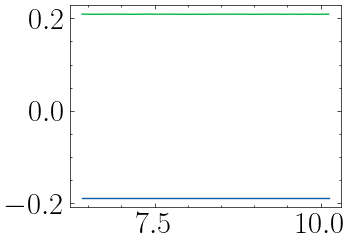

In [10]:
plt.plot(p.time,p.position, p.time,p.predict_position)

IndexError: positional indexers are out-of-bounds

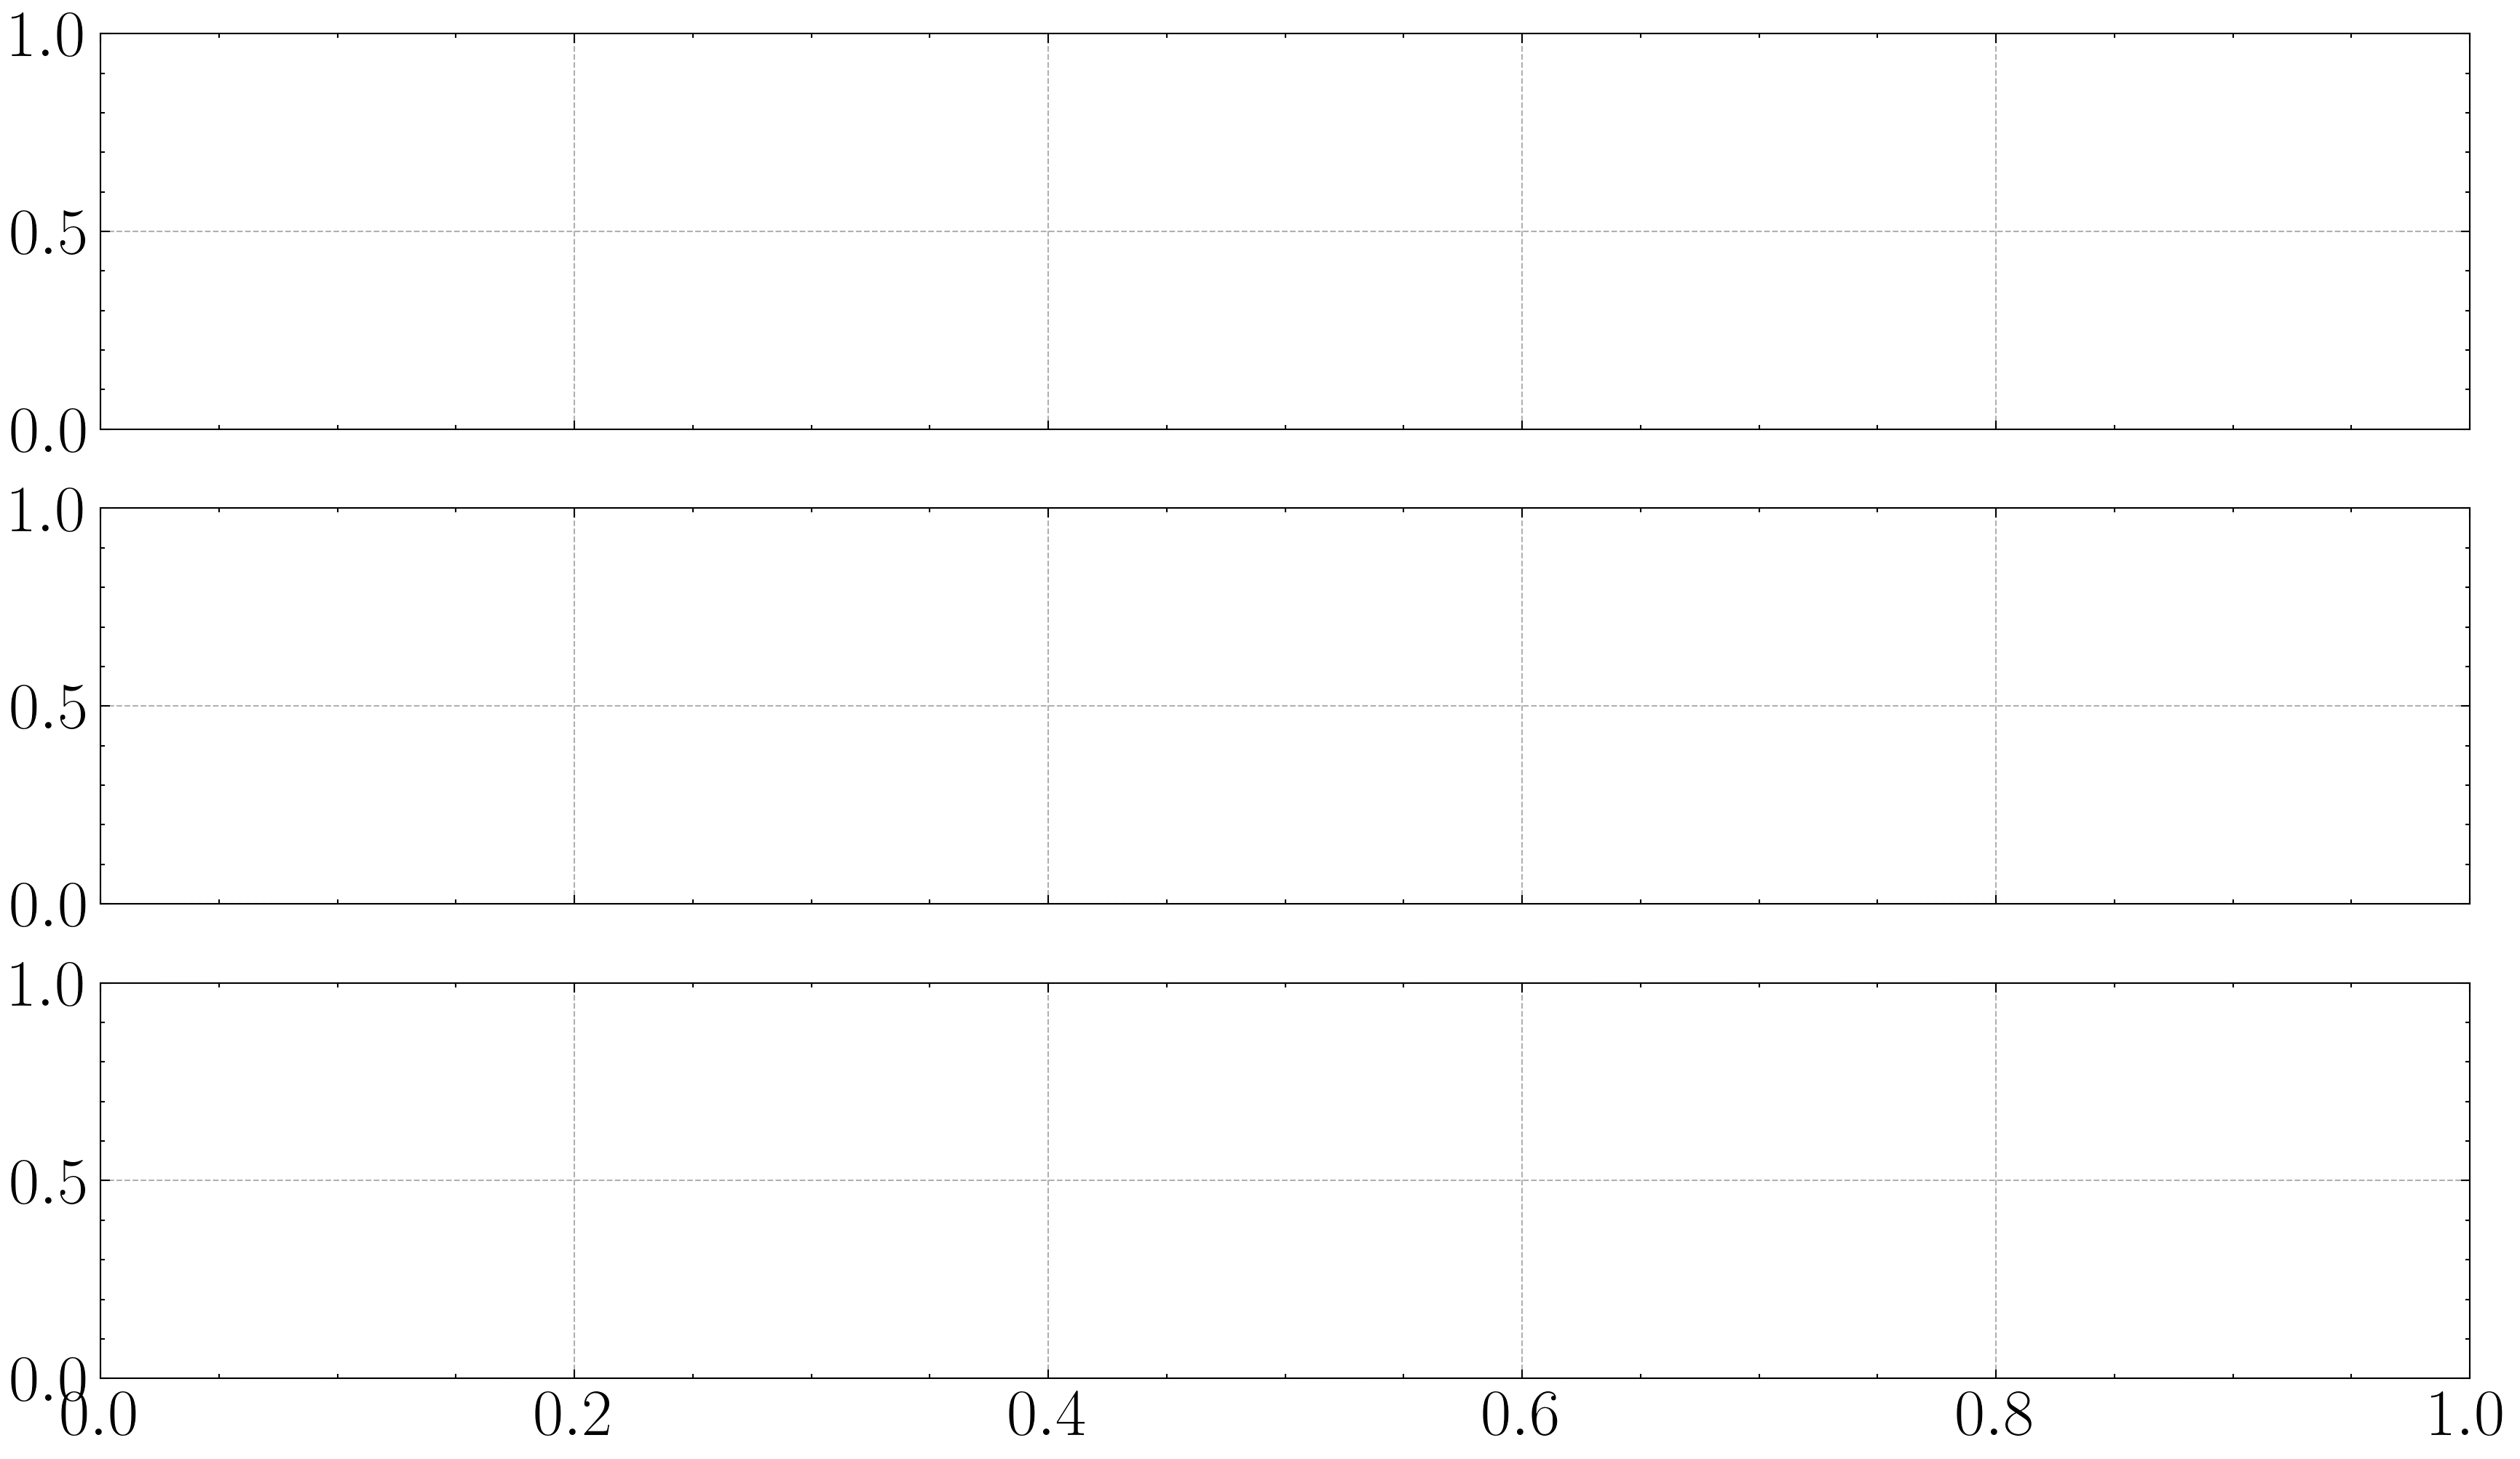

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(14, 8), sharex=True, dpi=300.0)
ax1.grid(linestyle='--'), ax2.grid(linestyle='--'), ax3.grid(linestyle='--')
x_range = np.arange(23, 1200)
# x_range = np.arange(50, 780)
sliced_data = p.iloc[x_range,:]
pos_cm = 100*sliced_data["position"].to_numpy()
target_pos_cm = 100*sliced_data["target_position"].to_numpy()
angle_rad = sliced_data["angle"].to_numpy()
cmd_normed = sliced_data["Q"].to_numpy()

t_range_ms = sliced_data["time"].to_numpy()
t_range_ms -= t_range_ms[0]

ax1.plot(t_range_ms, pos_cm, label="position")
ax1.plot(t_range_ms, target_pos_cm, "r--", label="target position")
ax2.plot(t_range_ms, angle_rad, label="angle")
ax2.plot(t_range_ms, np.zeros_like(angle_rad), "r--", label="upright balance")
ax3.plot(t_range_ms, cmd_normed)

ax1.legend(loc="upper right", fontsize="x-small")
ax2.legend(loc="upper right", fontsize="x-small")

fig.suptitle("Physical Cartpole Recording: Dance Mode")
ax3.set_xlabel("time (s)")
ax1.set_ylabel("position (cm)")
ax2.set_ylabel("angle (rad)")
ax3.set_ylabel(r"control $u_k$")

fig.align_ylabels()
fig.tight_layout(pad=1.0)